In [3]:
from dl import authClient as ac, queryClient as qc, storeClient as sc, helpers
import pylab as plt
import numpy as np
from astropy.io import fits
import matplotlib as mpl
import math
import astropy.io.fits as fits
from astropy.table import Table 

In [4]:
token=ac.login('mgkadrmas')

In [5]:
def roi_cut(xcut,ycut,x,y):
    """
    xcut : numpy array
         Array of x-values for the cut
    ycut : numpy array
         Array of y-values for the cut
    x : numpy array or list
         Array of x-values that should be cut
    y : numpy array or list
         Array of y-values that should be cut

    Returns
    ind : numpy array
       The indices of values OUTSIDE the cut
    cutind : 
       The indices of values INSIDE the cut

    """

    from matplotlib.path import Path
    tupVerts = list(zip(xcut,ycut))
    points = np.vstack((x,y)).T
    p = Path(tupVerts) # make a polygon
    inside = p.contains_points(points)
    ind, = np.where(~inside)
    cutind, = np.where(inside)

    return ind, cutind

In [6]:
def LMCParallax (ra,dec,radius): 
    res=qc.query(token,sql='select * from gaia_dr2.gaia_source where q3c_radial_query(ra,dec,'+str(ra)+','+str(dec)+','+str(radius)+')')
    df=helpers.utils.convert(res,'table') ##take query
    xcut=[0.762097,0.883065,1.312500,1.372984,1.457661,1.633065,1.826613,2.008065,1.983871,1.536290,1.403226,1.197581,1.070565,0.810484] #define x coordinates of polygon
    ycut=[19.049242,19.409091,19.465909,18.613636,17.856061,17.117424,16.473485,16.113636,15.469697,15.583333,16.303030,17.287879,17.969697,18.613636] #define y coordinates of polygon
    x=df['bp_rp'] 
    y=df['phot_g_mean_mag']
    (ind, cutind) = roi_cut(xcut,ycut,x,y) 
    df=df[cutind] #only data inside of the polygon!!
    medpmra=np.nanmedian(df['pmra'])
    medpmdec=np.nanmedian(df['pmdec'])
    pndist=np.sqrt((df['pmra']-medpmra)**2 + (df['pmdec']-medpmdec)**2)
    good= (np.abs(df['parallax'])<=0.2) & (pndist<=2.0)
    medplx=np.nanmedian(df['parallax'][good])+0.030112982075019102 #right offset?
    ngood=np.sum(good)
    Sd= (1/ngood)*math.sqrt(sum((medplx-(df['parallax'][good]))**2)) #standard deviation of mean
    sigma= (1/ngood)*np.sqrt(np.sum(df['parallax_error']**2)) #standard error of parallax
    print(ra, dec, medplx)
    return (ngood, medplx, Sd, sigma)
    

In [7]:
#expanded with a larger range: dec -80 to -55 #ra 55 to 110 

radius=0.5
dtype = np.dtype([('ra',float),('dec',float),('radius',float),('ngood',int),('parallax',float),('Sd',float),('sigma',float)])
cat = np.zeros([56,26],dtype=dtype)
for i in range (56):
    ra=i+55
    for j in range (26):
        dec=j-80
        (ngood, medplx, Sd, sigma) = LMCParallax(ra,dec,radius) 
        cat[i,j]['ra']=ra
        cat[i,j]['dec']=dec
        cat[i,j]['radius']=radius
        cat[i,j]['ngood']=ngood
        cat[i,j]['parallax']=medplx
        cat[i,j]['Sd']=Sd
        cat[i,j]['sigma']=sigma
        

/data0/sw/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less_equal
  return getattr(self.data, op)(other)


55 -80 0.098165927032718
55 -79 0.07859826548948146
55 -78 0.07800915080601865
55 -77 0.0853811895358956
55 -76 0.0992957102179813
55 -75 0.06960823667907515
55 -74 0.1121429006977455
55 -73 0.0401317448483134
55 -72 0.061282531473097
55 -71 0.043983053486494506
55 -70 0.1076686016733135
55 -69 0.0872400943952058
55 -68 0.16076468839754812
55 -67 0.0671136951988494
55 -66 0.0867416438861653
55 -65 0.07245840662294485
55 -64 0.1087543053351416
55 -63 0.06696626748241036
55 -62 0.1420964944579541
55 -61 0.077389738645644
55 -60 -0.029566017180502998
55 -59 0.07458848227253626
55 -58 0.102016688966425
55 -57 0.0389765893086733
55 -56 0.06454567429574995
55 -55 0.12804935011164162
56 -80 0.09187302984698215
56 -79 0.0986288939906828
56 -78 0.10099488121185364
56 -77 0.1077514133385985
56 -76 0.0947542260836834
56 -75 0.09473025454630335
56 -74 0.1085604988115011
56 -73 0.0309002468858649
56 -72 0.0716875581367154
56 -71 0.0700863900464012
56 -70 0.0769557981462633
56 -69 0.0921683673879889

66 -60 0.0640730146948073
66 -59 0.1374868060622141
66 -58 0.107601372149745
66 -57 0.1008590771512206
66 -56 0.1544997095301966
66 -55 0.055041385226592
67 -80 0.1083224042293303
67 -79 0.06726467599120045
67 -78 0.08239954799531735
67 -77 0.027102559384401002
67 -76 0.0246198346333432
67 -75 0.0176481254073551
67 -74 0.01970799876435425
67 -73 0.0195177949702575
67 -72 0.02146550201149465
67 -71 0.0183506341347072
67 -70 0.020816708321015003
67 -69 0.018337683049106004
67 -68 0.0202132130318593
67 -67 0.025572578566572753
67 -66 0.0235359669852036
67 -65 0.01901374887179235
67 -64 0.013929259960342801
67 -63 0.034674331787340404
67 -62 0.014748966316641602
67 -61 0.0319898962209276
67 -60 0.011316537499539502
67 -59 0.1120647474410284
67 -58 0.08480491016710011
67 -57 0.087850785205722
67 -56 0.14413076009701112
67 -55 0.12954845786393615
68 -80 0.0986333896837818
68 -79 0.0943577743815416
68 -78 0.0785078969191291
68 -77 0.0219678693094348
68 -76 0.022531035731460102
68 -75 0.018552

78 -67 0.013922360940876802
78 -66 0.011589551698588052
78 -65 0.019928139283168552
78 -64 0.030485578726730203
78 -63 0.0278558206796808
78 -62 0.022939550419488204
78 -61 0.035936304495323604
78 -60 0.0320425156639062
78 -59 0.0567900856893169
78 -58 0.1554501339307561
78 -57 0.0644856614017696
78 -56 0.08650437452902031
78 -55 0.13427740744002994
79 -80 0.1001630533685169
79 -79 0.10796892788845296
79 -78 0.1269504419282654
79 -77 0.0318300325037517
79 -76 0.022037233815026
79 -75 0.022671993969138
79 -74 0.025458426699466203
79 -73 0.02196424348891145
79 -72 0.017691022813334
79 -71 0.019301115868099402
79 -70 0.019714810780399553
79 -69 0.0157215032810014
79 -68 0.013517868649018203
79 -67 0.00936602514829105
79 -66 0.0163956552392739
79 -65 0.018698428445095953
79 -64 0.0315195825777462
79 -63 0.0267263688147862
79 -62 0.02761306566787125
79 -61 0.0329440943865453
79 -60 0.02950848906353625
79 -59 0.027881042610830603
79 -58 0.0898862753114534
79 -57 0.0343498033259503
79 -56 0.0

90 -75 0.0211988696240029
90 -74 0.024949882786523353
90 -73 0.0223583473149625
90 -72 0.0213734168431522
90 -71 0.027191202144418402
90 -70 0.025037871409216202
90 -69 0.0325517854227549
90 -68 0.028532295076598102
90 -67 0.0257775562794878
90 -66 0.029200803427392903
90 -65 0.026839884188854902
90 -64 0.026294306245283304
90 -63 0.025186415840668202
90 -62 0.034078779283183404
90 -61 0.0255805606242233
90 -60 0.0495419115282599
90 -59 0.1189734572278598
90 -58 0.1026251410708449
90 -57 0.081718004839525
90 -56 0.11371736371075895
90 -55 0.12681273116348651
91 -80 0.0837818953570369
91 -79 0.086585354763832
91 -78 0.09545811215054224
91 -77 0.0339008716785944
91 -76 0.016624697697598403
91 -75 0.025141976240058803
91 -74 0.0247711757901179
91 -73 0.020464508038069602
91 -72 0.02414765149377115
91 -71 0.02619632187594205
91 -70 0.026170810515692502
91 -69 0.02665680639170645
91 -68 0.0296769454298656
91 -67 0.0279249325376473
91 -66 0.02983758194199405
91 -65 0.0330747013508976
91 -64 

101 -55 0.1109389543687989
102 -80 0.0996389046895465
102 -79 0.11180622045108986
102 -78 0.11789511027678175
102 -77 0.124407249027134
102 -76 0.115339735572715
102 -75 0.1102763380367206
102 -74 0.066503334011352
102 -73 0.03623116091402765
102 -72 0.03016564197272465
102 -71 0.0411548152862284
102 -70 0.0227618899030333
102 -69 0.031743428286188
102 -68 0.024757900584496353
102 -67 0.027048741241544553
102 -66 0.031213181811561852
102 -65 0.09788809489289829
102 -64 0.11310716208986764
102 -63 0.09319652969093205
102 -62 0.0938552501764171
102 -61 0.0990237927106294
102 -60 0.1029363932403352
102 -59 0.1005802988846348
102 -58 0.0905244940412884
102 -57 0.07606048742546011
102 -56 0.0782127684616415
102 -55 0.0819017279511393
103 -80 0.12096777176201699
103 -79 0.11392807309161924
103 -78 0.1046446669944132
103 -77 0.111196107389573
103 -76 0.10486385195912924
103 -75 0.1193704190468594
103 -74 0.08609982226330555
103 -73 0.0744584744009007
103 -72 0.0547310065028486
103 -71 0.02782

In [8]:
acat = Table(cat)

In [9]:
acat.write('LMCParallaxRedo.fits', format='fits')

In [10]:
acat=fits.getdata('LMCParallaxRedo.fits')

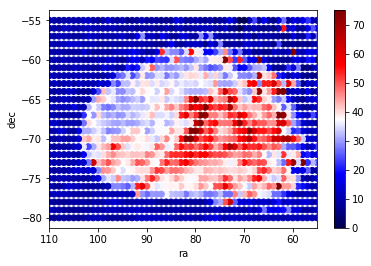

In [11]:
#Parallax expanded
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_xlim([110,55])
sc = ax.scatter(acat['ra'],acat['dec'],c=1/acat['parallax'], vmax=75, vmin=0, cmap=plt.cm.seismic)
fig.colorbar(sc)